In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

In [ ]:
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-03-31 23:00', freq='H')

df = pd.DataFrame({
    'Timestamp': date_rng,
    'Production_Tons': np.random.normal(loc=50, scale=10, size=len(date_rng)).clip(min=10)
})


<ipython-input-12-9511dffe9530>:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [ ]:
# Introduce some anomalies
df.loc[np.random.choice(df.index, 10), 'Production_Tons'] *= 1.8

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [ ]:
hourly = df['Production_Tons'].resample('H').sum()
daily = df['Production_Tons'].resample('D').sum()
weekly = df['Production_Tons'].resample('W').sum()

<ipython-input-15-220f7eb4686a>:1: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [ ]:
daily_df = daily.to_frame(name='Daily_Tons')
daily_df['Z_Score'] = zscore(daily_df['Daily_Tons'])
daily_df['Anomaly'] = np.where(np.abs(daily_df['Z_Score']) > 2, 'Yes', 'No')

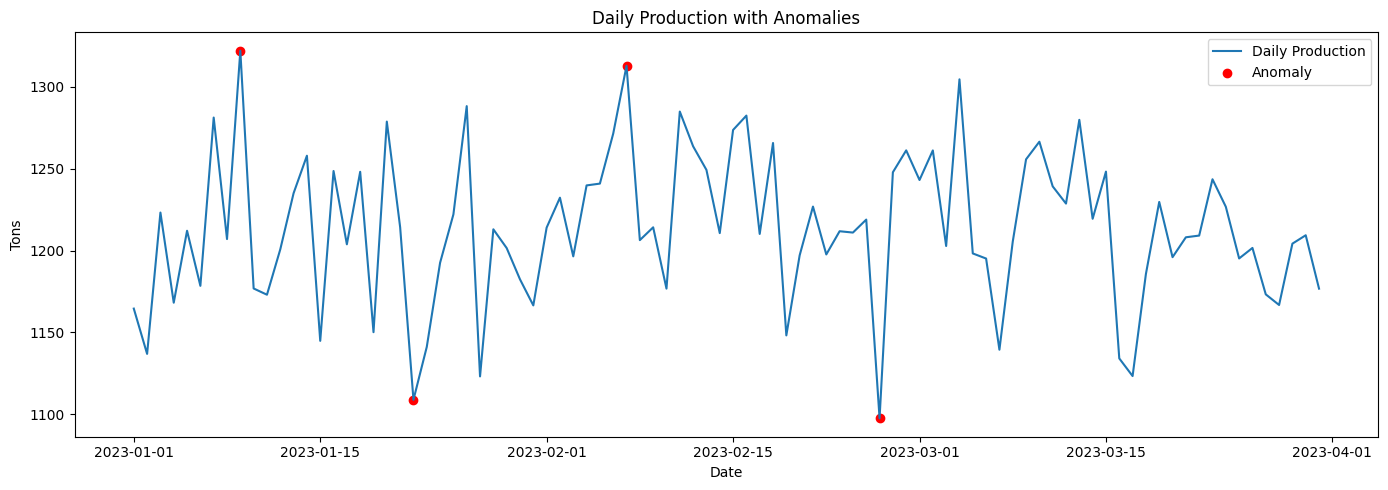

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(daily.index, daily.values, label='Daily Production')
plt.scatter(daily_df[daily_df['Anomaly'] == 'Yes'].index,
            daily_df[daily_df['Anomaly'] == 'Yes']['Daily_Tons'],
            color='red', label='Anomaly')
plt.title("Daily Production with Anomalies")
plt.xlabel("Date")
plt.ylabel("Tons")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
fig = px.line(daily_df, y='Daily_Tons', title='Daily Production Trend (Interactive)')
fig.update_traces(mode='lines+markers')
fig.show()


In [ ]:
print("Total Production:", df['Production_Tons'].sum(), "tons")
print("Average Daily Production:", daily.mean(), "tons")
print("Number of Anomalous Days:", daily_df['Anomaly'].value_counts().get('Yes', 0))
print("\nAnomalous Dates:")
print(daily_df[daily_df['Anomaly'] == 'Yes'].index.date)

Total Production: 109201.98734766389 tons
Average Daily Production: 1213.3554149740432 tons
Number of Anomalous Days: 4

Anomalous Dates:
[datetime.date(2023, 1, 9) datetime.date(2023, 1, 22)
 datetime.date(2023, 2, 7) datetime.date(2023, 2, 26)]
